## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  92.775547   381.404827  0.466433  10.981921  1.056856
1  74.080574  1047.981749  0.627950   7.998459  1.417093
2  72.625502   616.365023  0.115919   2.377452  0.736206
3  29.394533  1548.675369  0.957049  10.748644  1.564071
4   3.629023   859.048869  0.249056   9.338941  1.475825


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9705719	total: 57ms	remaining: 57s
1:	learn: 0.9621125	total: 57.5ms	remaining: 28.7s
2:	learn: 0.9525614	total: 58ms	remaining: 19.3s
3:	learn: 0.9425653	total: 58.5ms	remaining: 14.6s
4:	learn: 0.9358756	total: 58.9ms	remaining: 11.7s
5:	learn: 0.9275834	total: 59.3ms	remaining: 9.83s
6:	learn: 0.9201973	total: 59.8ms	remaining: 8.49s
7:	learn: 0.9120806	total: 60.2ms	remaining: 7.47s
8:	learn: 0.9053791	total: 60.7ms	remaining: 6.68s
9:	learn: 0.8975809	total: 61.1ms	remaining: 6.05s
10:	learn: 0.8887743	total: 61.6ms	remaining: 5.53s
11:	learn: 0.8803101	total: 62.2ms	remaining: 5.12s
12:	learn: 0.8722384	total: 62.8ms	remaining: 4.77s
13:	learn: 0.8644258	total: 63.4ms	remaining: 4.47s
14:	learn: 0.8555758	total: 64ms	remaining: 4.2s
15:	learn: 0.8477767	total: 64.7ms	remaining: 3.98s
16:	learn: 0.8395495	total: 65.1ms	remaining: 3.76s
17:	learn: 0.8327473	total: 66.2ms	remaining: 3.61s
18:	learn: 0.8278733	total: 66.6ms	remaining: 3.44s
1

89:	learn: 0.4800031	total: 99ms	remaining: 1s
90:	learn: 0.4764514	total: 99.6ms	remaining: 995ms
91:	learn: 0.4725459	total: 100ms	remaining: 987ms
92:	learn: 0.4694967	total: 100ms	remaining: 979ms
93:	learn: 0.4662524	total: 101ms	remaining: 972ms
94:	learn: 0.4628119	total: 101ms	remaining: 965ms
95:	learn: 0.4592385	total: 102ms	remaining: 958ms
96:	learn: 0.4559630	total: 102ms	remaining: 951ms
97:	learn: 0.4533514	total: 103ms	remaining: 944ms
98:	learn: 0.4511773	total: 103ms	remaining: 938ms
99:	learn: 0.4484276	total: 103ms	remaining: 930ms
100:	learn: 0.4458090	total: 104ms	remaining: 926ms
101:	learn: 0.4443030	total: 104ms	remaining: 920ms
102:	learn: 0.4412556	total: 105ms	remaining: 913ms
103:	learn: 0.4382122	total: 105ms	remaining: 906ms
104:	learn: 0.4357555	total: 106ms	remaining: 902ms
105:	learn: 0.4330609	total: 106ms	remaining: 896ms
106:	learn: 0.4301859	total: 107ms	remaining: 890ms
107:	learn: 0.4278583	total: 107ms	remaining: 886ms
108:	learn: 0.4249683	tota

279:	learn: 0.1967490	total: 185ms	remaining: 476ms
280:	learn: 0.1960050	total: 186ms	remaining: 476ms
281:	learn: 0.1952858	total: 186ms	remaining: 475ms
282:	learn: 0.1946691	total: 187ms	remaining: 474ms
283:	learn: 0.1940910	total: 188ms	remaining: 473ms
284:	learn: 0.1932498	total: 188ms	remaining: 472ms
285:	learn: 0.1926857	total: 189ms	remaining: 471ms
286:	learn: 0.1917484	total: 189ms	remaining: 469ms
287:	learn: 0.1907528	total: 189ms	remaining: 468ms
288:	learn: 0.1901157	total: 190ms	remaining: 467ms
289:	learn: 0.1894185	total: 190ms	remaining: 465ms
290:	learn: 0.1885140	total: 191ms	remaining: 464ms
291:	learn: 0.1880193	total: 191ms	remaining: 463ms
292:	learn: 0.1876940	total: 191ms	remaining: 462ms
293:	learn: 0.1869934	total: 192ms	remaining: 461ms
294:	learn: 0.1862921	total: 193ms	remaining: 461ms
295:	learn: 0.1858727	total: 193ms	remaining: 460ms
296:	learn: 0.1852513	total: 194ms	remaining: 459ms
297:	learn: 0.1846479	total: 194ms	remaining: 458ms
298:	learn: 

454:	learn: 0.1106161	total: 275ms	remaining: 329ms
455:	learn: 0.1102318	total: 275ms	remaining: 328ms
456:	learn: 0.1101361	total: 276ms	remaining: 328ms
457:	learn: 0.1095936	total: 276ms	remaining: 327ms
458:	learn: 0.1092426	total: 276ms	remaining: 326ms
459:	learn: 0.1090662	total: 277ms	remaining: 325ms
460:	learn: 0.1086928	total: 278ms	remaining: 324ms
461:	learn: 0.1083048	total: 278ms	remaining: 323ms
462:	learn: 0.1081337	total: 278ms	remaining: 323ms
463:	learn: 0.1077555	total: 279ms	remaining: 322ms
464:	learn: 0.1071769	total: 279ms	remaining: 321ms
465:	learn: 0.1068107	total: 280ms	remaining: 320ms
466:	learn: 0.1066756	total: 280ms	remaining: 320ms
467:	learn: 0.1061496	total: 280ms	remaining: 319ms
468:	learn: 0.1059850	total: 281ms	remaining: 318ms
469:	learn: 0.1054186	total: 281ms	remaining: 317ms
470:	learn: 0.1050112	total: 282ms	remaining: 317ms
471:	learn: 0.1049066	total: 283ms	remaining: 316ms
472:	learn: 0.1045093	total: 283ms	remaining: 315ms
473:	learn: 

652:	learn: 0.0673281	total: 361ms	remaining: 192ms
653:	learn: 0.0671035	total: 362ms	remaining: 191ms
654:	learn: 0.0670599	total: 362ms	remaining: 191ms
655:	learn: 0.0668669	total: 363ms	remaining: 190ms
656:	learn: 0.0667992	total: 363ms	remaining: 190ms
657:	learn: 0.0667564	total: 364ms	remaining: 189ms
658:	learn: 0.0664182	total: 364ms	remaining: 189ms
659:	learn: 0.0663760	total: 365ms	remaining: 188ms
660:	learn: 0.0661593	total: 365ms	remaining: 187ms
661:	learn: 0.0661175	total: 366ms	remaining: 187ms
662:	learn: 0.0659309	total: 366ms	remaining: 186ms
663:	learn: 0.0658887	total: 367ms	remaining: 186ms
664:	learn: 0.0657130	total: 367ms	remaining: 185ms
665:	learn: 0.0653818	total: 368ms	remaining: 184ms
666:	learn: 0.0652628	total: 368ms	remaining: 184ms
667:	learn: 0.0650542	total: 368ms	remaining: 183ms
668:	learn: 0.0650140	total: 369ms	remaining: 182ms
669:	learn: 0.0647606	total: 369ms	remaining: 182ms
670:	learn: 0.0646468	total: 369ms	remaining: 181ms
671:	learn: 

865:	learn: 0.0410156	total: 455ms	remaining: 70.4ms
866:	learn: 0.0409731	total: 456ms	remaining: 69.9ms
867:	learn: 0.0407669	total: 456ms	remaining: 69.4ms
868:	learn: 0.0406790	total: 456ms	remaining: 68.8ms
869:	learn: 0.0405953	total: 457ms	remaining: 68.3ms
870:	learn: 0.0404475	total: 457ms	remaining: 67.7ms
871:	learn: 0.0403887	total: 457ms	remaining: 67.2ms
872:	learn: 0.0403357	total: 458ms	remaining: 66.6ms
873:	learn: 0.0402947	total: 458ms	remaining: 66.1ms
874:	learn: 0.0400942	total: 459ms	remaining: 65.5ms
875:	learn: 0.0400539	total: 459ms	remaining: 65ms
876:	learn: 0.0399254	total: 460ms	remaining: 64.5ms
877:	learn: 0.0398855	total: 460ms	remaining: 63.9ms
878:	learn: 0.0398462	total: 461ms	remaining: 63.4ms
879:	learn: 0.0396756	total: 461ms	remaining: 62.9ms
880:	learn: 0.0394812	total: 461ms	remaining: 62.3ms
881:	learn: 0.0394565	total: 462ms	remaining: 61.8ms
882:	learn: 0.0394321	total: 462ms	remaining: 61.2ms
883:	learn: 0.0393119	total: 462ms	remaining: 60

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

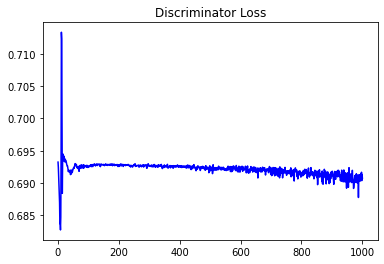

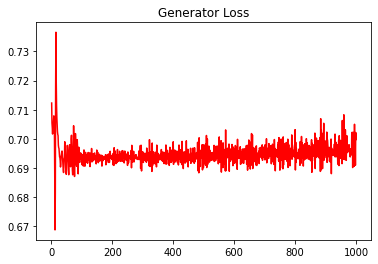

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.2530642978255009


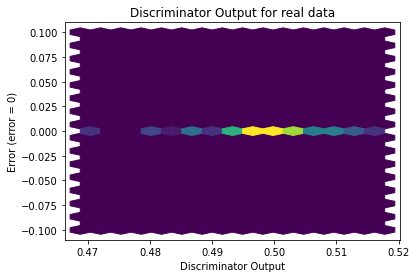

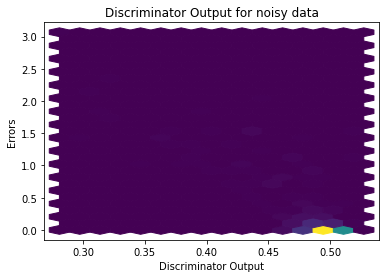

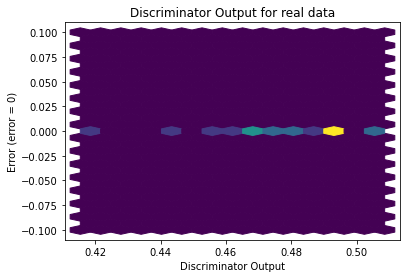

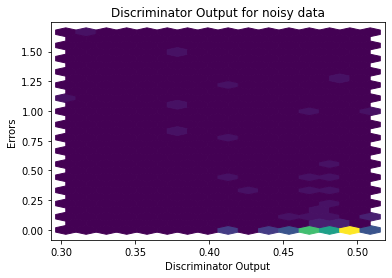

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


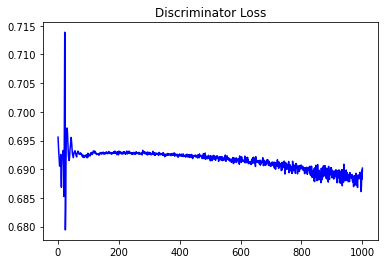

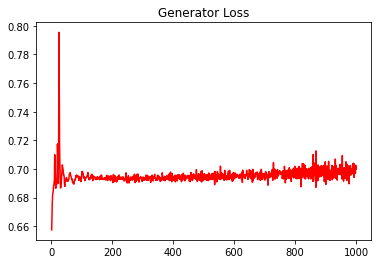

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.27295674893119215


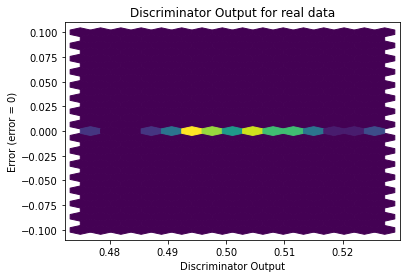

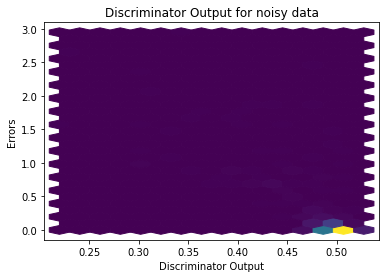

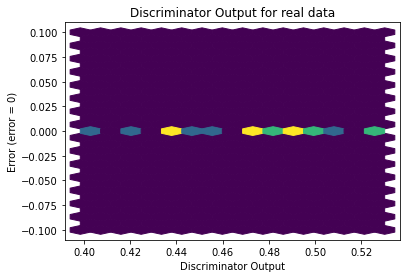

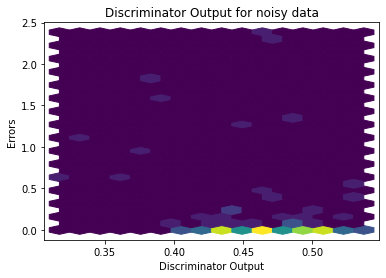

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4313]], requires_grad=True)
